In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-e-commerce-sales-dataset-2025/synthetic_ecommerce_sales_2025.csv


# **Data Adquisition**

Proceso mediante el cual se obtienen los inputs y se hace el análisis pre exploración de la información.

In [45]:
data = pd.read_csv('/kaggle/input/synthetic-e-commerce-sales-dataset-2025/synthetic_ecommerce_sales_2025.csv')

# **Exploratory Data Analytics**

In [46]:
# Visualizar los primeros valores
data.head()

,order_id,customer_id,product_category,product_price,quantity,order_date,region,payment_method,delivery_days,is_returned,customer_rating,discount_percent,revenue
0,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Beauty,190.40,5,2023-02-21,Europe,BankTransfer,8,0,3.8,0,952.00
1,2,23b8c1e9-3924-46de-beb1-3b9046685257,Fashion,82.22,3,2023-10-13,North America,CreditCard,5,0,3.8,0,246.66
2,3,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Beauty,15.19,2,2023-06-28,Oceania,Cash,6,1,2.0,10,27.34
3,4,972a8469-1641-4f82-8b9d-2434e465e150,Electronics,310.65,2,2023-07-11,Europe,PayPal,9,0,2.9,5,590.23
4,5,17fc695a-07a0-4a6e-8822-e8f36c031199,Fashion,74.05,4,2023-02-24,Africa,PayPal,3,1,3.1,20,236.96


In [47]:
# Detalles del dataset
print('Cantidad de registros: ', data.shape[0])
print('Cantidad de columnas: ', data.shape[1])

Cantidad de registros:  100000
Cantidad de columnas:  13


In [48]:
print('Nombres de columnas: \n',data.columns)

Nombres de columnas: 
 Index(['order_id', 'customer_id', 'product_category', 'product_price',
       'quantity', 'order_date', 'region', 'payment_method', 'delivery_days',
       'is_returned', 'customer_rating', 'discount_percent', 'revenue'],
      dtype='object')


In [49]:
print('Tipos de columnas: \n', data.dtypes)

Tipos de columnas: 
 order_id              int64
customer_id          object
product_category     object
product_price       float64
quantity              int64
order_date           object
region               object
payment_method       object
delivery_days         int64
is_returned           int64
customer_rating     float64
discount_percent      int64
revenue             float64
dtype: object


In [50]:
categorical_values = data.select_dtypes(include=['object']).columns
categorical_values = list(categorical_values)
print('Variables categoricas: ', categorical_values)

Variables categoricas:  ['customer_id', 'product_category', 'order_date', 'region', 'payment_method']


In [51]:
numerical_values = data.select_dtypes(include=['int64','float64']).columns
numerical_values = list(numerical_values)
print('Variables numericas: ', numerical_values)

Variables numericas:  ['order_id', 'product_price', 'quantity', 'delivery_days', 'is_returned', 'customer_rating', 'discount_percent', 'revenue']


## **Limpieza y transformación de data**

In [52]:
# Primero eliminaremos los valores que no nos sirven como parte del análisis
data_sales = data.drop(columns=['order_id','customer_id'])
data_sales.head()

,product_category,product_price,quantity,order_date,region,payment_method,delivery_days,is_returned,customer_rating,discount_percent,revenue
0,Beauty,190.40,5,2023-02-21,Europe,BankTransfer,8,0,3.8,0,952.00
1,Fashion,82.22,3,2023-10-13,North America,CreditCard,5,0,3.8,0,246.66
2,Beauty,15.19,2,2023-06-28,Oceania,Cash,6,1,2.0,10,27.34
3,Electronics,310.65,2,2023-07-11,Europe,PayPal,9,0,2.9,5,590.23
4,Fashion,74.05,4,2023-02-24,Africa,PayPal,3,1,3.1,20,236.96


In [53]:
# Hacemos la limpieza en las variables categóricas y numéricas por ID
categorical_values.remove('customer_id')
numerical_values.remove('order_id')

In [54]:
# Análisis de valores nulos
data_sales.isnull().sum()

product_category    0
product_price       0
quantity            0
order_date          0
region              0
payment_method      0
delivery_days       0
is_returned         0
customer_rating     0
discount_percent    0
revenue             0
dtype: int64

In [89]:
# Análisis por variables categóricas
print('--Valores únicos--')
for cat in categorical_values:
    print('Valores únicos de',cat,': ', data_sales[cat].unique())

print('\n--Cantidad de valores únicos--')
for cat in categorical_values:
    print('Cantidad de Valores únicos de',cat,': ', data_sales[cat].nunique())

--Valores únicos--
Valores únicos de product_category :  ['Beauty' 'Fashion' 'Electronics' 'Sports' 'Automotive' 'Home' 'Toys']
Valores únicos de order_date :  ['2023-02-21' '2023-10-13' '2023-06-28' ... '2023-02-28' '2024-04-24'
 '2024-12-16']
Valores únicos de region :  ['Europe' 'North America' 'Oceania' 'Africa' 'Asia' 'South America']
Valores únicos de payment_method :  ['BankTransfer' 'CreditCard' 'Cash' 'PayPal']

--Cantidad de valores únicos--
Cantidad de Valores únicos de product_category :  7
Cantidad de Valores únicos de order_date :  1096
Cantidad de Valores únicos de region :  6
Cantidad de Valores únicos de payment_method :  4


## **Diccionario de datos**

Necesitamos identificar cuáles son las principales variables por las que identificaríamos una de ellas como importante o relevante con respecto al revenue (retorno o ganancia). Para eso, hacemos el análisis por cada una de las variables.

**Variables analizables**
* Product Category → La categoría de producto es importante de analizar ya que depende de las preferencias por tipos o descubrir cuáles son los tipos de productos más vendidos.
* Product Price → El precio del producto, asociado a su categoría le brinda una mayor seguridad de compra al cliente.
* Quantity → Determina el volumen que los clientes están dispuestos a comprar.
* Order Date → La fecha evalúa los cambios de tendencias por fechas.
* Region → Depende del contexto sociocultural.
* Payment Method → El método de pago asegura cuál es el medio de pago más útilizado por los clientes.
* Is Returned → Permite identificar si el cliente se sintió satisfecho con el producto o no.
* Customer Rating → Principalmente, permite identificar la satisfacción del cliente con el producto.
* Discount Percent → Permite medir si el cliente compraría el producto dependiente de algún descuento.

**Variables no analizables**
* Delivery Days → Principalmente no lo tomo en consideración por que es una variable que sirve más para la identificación de la satisfacción del cliente, más que la dependencia a la posterior ganancia.

## **Análisis monovariable**

### **Variables categóricas**

In [84]:
# Librerías para el análisis
import matplotlib.pyplot as plt
import seaborn as sns

Cantidades por categoría de producto: 
 product_category
Electronics    14375
Sports         14354
Fashion        14327
Toys           14289
Automotive     14239
Beauty         14234
Home           14182
Name: count, dtype: int64

Porcentaje por categoría de producto: 
 product_category
Electronics    14.375
Sports         14.354
Fashion        14.327
Toys           14.289
Automotive     14.239
Beauty         14.234
Home           14.182
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


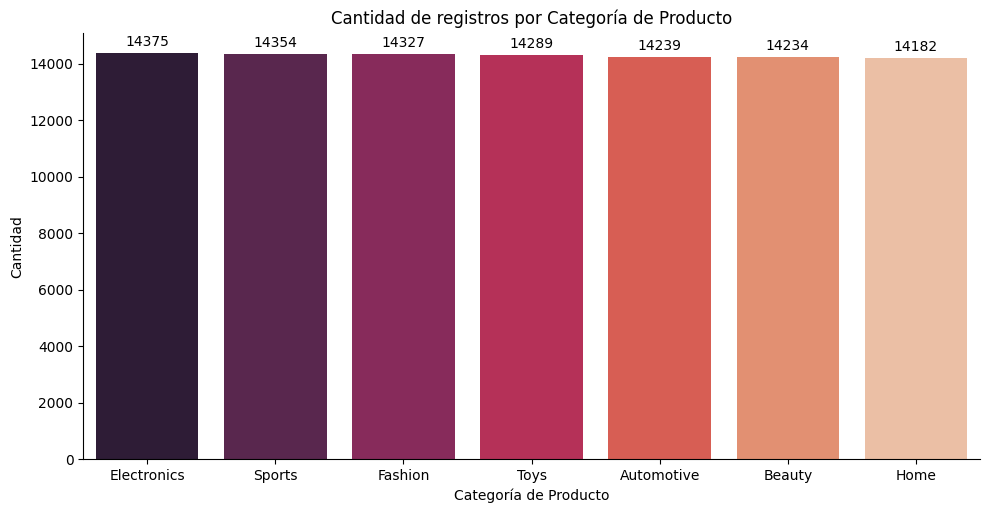

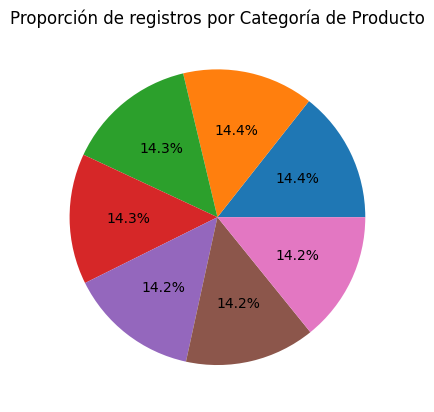

In [100]:
# Análisis a la categoría del producto

print('Cantidades por categoría de producto: \n',data_sales['product_category'].value_counts())

print('\nPorcentaje por categoría de producto: \n',data_sales['product_category'].value_counts(normalize=True)*100)

# Definición de orden ascendente
order = data_sales['product_category'].value_counts().index

# Generación de gráfica de conteo
plot = sns.catplot(data=data_sales, x='product_category',kind='count',height=5, aspect=2, order=order, palette='rocket')

# Agregar etiquetas con el valor exacto encima de cada barra
for ax in plot.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')
        
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.title('Cantidad de registros por Categoría de Producto')
plt.show()

# Generación de gráfica circular
plt.pie(x= data_sales['product_category'].value_counts(), autopct='%1.1f%%')
plt.title('Proporción de registros por Categoría de Producto')
plt.show()

Cantidades por región: 
 region
Oceania          16965
Asia             16763
North America    16749
South America    16560
Europe           16513
Africa           16450
Name: count, dtype: int64

Porcentaje por región: 
 region
Oceania          16.965
Asia             16.763
North America    16.749
South America    16.560
Europe           16.513
Africa           16.450
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


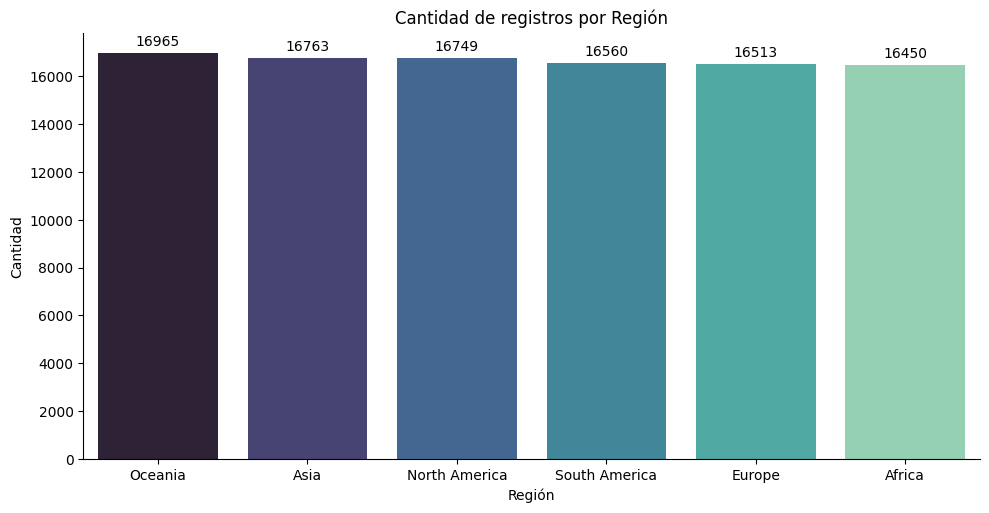

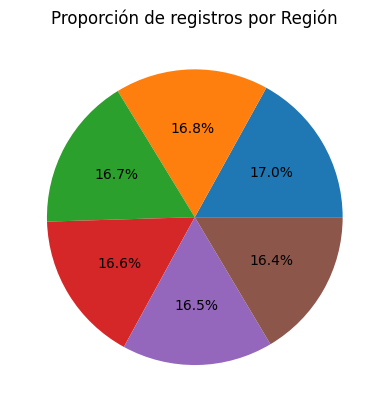

In [102]:
# Análisis a la región

print('Cantidades por región: \n',data_sales['region'].value_counts())

print('\nPorcentaje por región: \n',data_sales['region'].value_counts(normalize=True)*100)

# Definición de orden ascendente
order = data_sales['region'].value_counts().index

# Generación de gráfica de conteo
plot = sns.catplot(data=data_sales, x='region',kind='count',height=5, aspect=2, order=order, palette='mako')

# Agregar etiquetas con el valor exacto encima de cada barra
for ax in plot.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')
        
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.title('Cantidad de registros por Región')
plt.show()

# Generación de gráfica circular
plt.pie(x= data_sales['region'].value_counts(), autopct='%1.1f%%')
plt.title('Proporción de registros por Región')
plt.show()

Cantidades por método de pago: 
 payment_method
CreditCard      25222
BankTransfer    25083
PayPal          24985
Cash            24710
Name: count, dtype: int64

Porcentaje por método de pago: 
 payment_method
CreditCard      25.222
BankTransfer    25.083
PayPal          24.985
Cash            24.710
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


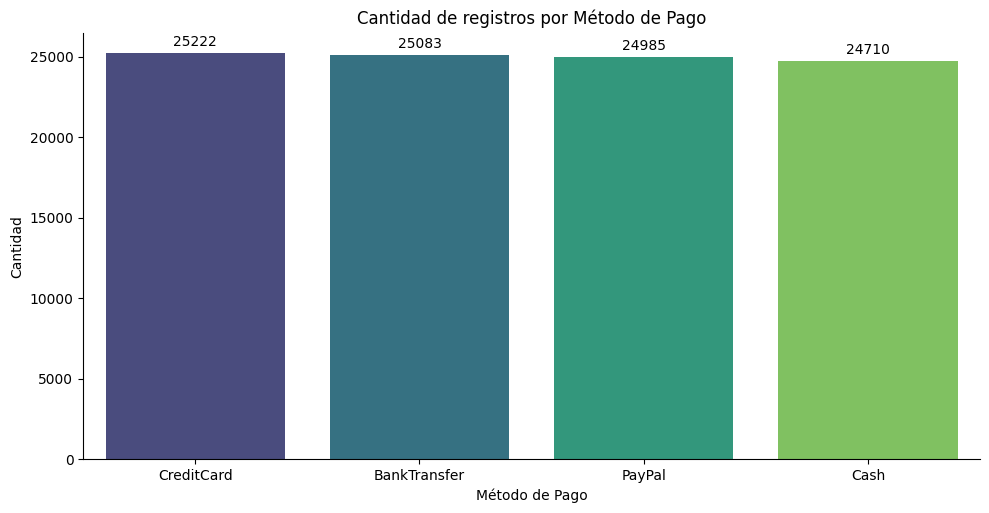

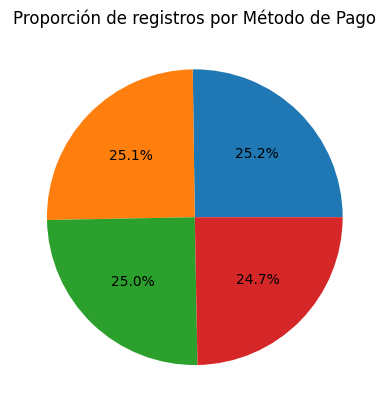

In [101]:
# Análisis al método de pago

print('Cantidades por método de pago: \n',data_sales['payment_method'].value_counts())

print('\nPorcentaje por método de pago: \n',data_sales['payment_method'].value_counts(normalize=True)*100)

# Definición de orden ascendente
order = data_sales['payment_method'].value_counts().index

# Generación de gráfica de conteo
plot = sns.catplot(data=data_sales, x='payment_method',kind='count',height=5, aspect=2, order=order, palette='viridis')

# Agregar etiquetas con el valor exacto encima de cada barra
for ax in plot.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')
        
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad')
plt.title('Cantidad de registros por Método de Pago')
plt.show()

# Generación de gráfica circular
plt.pie(x= data_sales['payment_method'].value_counts(), autopct='%1.1f%%')
plt.title('Proporción de registros por Método de Pago')
plt.show()

> ***Nota: Es importante tener en consideración que no se puede hacer un análisis más extenso con las variables categóricas por que quedaría pendiente la fecha de orden, la cual no tiene mucha relevancia de manera unitaria, pero sí en un análisis multivariado.***

Conclusiones análisis monovariado en variables categóricas:
* No se presenta dispersión significativa entre la proporción de data por cada variable categórica.
* En la categoría de productos, la categoría que resalta es productos electrónicos.
* Fuera de todo lo reconocido, la data concluye que la Región con mayor adquisición de productos es Oceania, al menos en repitencia (no necesariamente por la cantidad de productos comprados).
* Las tarjetas de crédito son el medio de pago más común, mientras que el dinero en efectivo pierde relevancia ligeramente.

### **Variables numéricas**

In [ ]:
#TODO